# Домашнее задание 2: Pandas для анализа данных

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [30]:
DIABETS = 'https://raw.githubusercontent.com/evgpat/datasets/main/pima_indians_diabetes.csv'

In [31]:
data = pd.read_csv(DIABETS)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

## Задание 1

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов (но мы должны видеть как вы это делали).

Для тех переменных, в которых есть пропуске, выведите количество пропущенных значений в следующем формате:

"В переменной {название переменной} {количество} пропущенных значений"

In [32]:
# решение
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

In [33]:
for col in data.columns:
    print('В переменной', col, data[col].isna().sum(), 'пропущенных значений')

В переменной Pregnancies 0 пропущенных значений
В переменной Glucose 5 пропущенных значений
В переменной BloodPressure 35 пропущенных значений
В переменной SkinThickness 227 пропущенных значений
В переменной Insulin 374 пропущенных значений
В переменной BMI 11 пропущенных значений
В переменной DiabetesPedigreeFunction 0 пропущенных значений
В переменной Age 0 пропущенных значений
В переменной Class 0 пропущенных значений


## Задание 2

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [34]:
# решение
data.fillna({'Pregnancies':data.Pregnancies.median(),'Glucose':data.Glucose.median(),'BloodPressure':data.BloodPressure.median(),'SkinThickness':data.SkinThickness.median(),'Insulin':data.Insulin.median(),'Age':data.Age.median()}, inplace=True)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,NaN,0.232,54,1


In [35]:
data.fillna({'BMI':data.BMI.mean(),'DiabetesPedigreeFunction':data.DiabetesPedigreeFunction.mean()}, inplace=True)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1


## Задание 3

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [36]:
# решение
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.4000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Задание 4

У скольких женщин старше 50 лет обнаружен диабет?

In [37]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
# data[(data.Age > 50) & (data.Class == 1)].shape[0]  # старше 50 с диабетом
len(data[(data['Age'] > 50) & (data['Class'] == 1)]) #вроде бы работает быстрее, чем через shape

38

## Задание 5

Найдите трех женщин с наибольшими числом беременностей.

In [38]:
# решение
data.sort_values(by='Pregnancies', ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


## Задание 6

Сколько женщин успели родить 3 или более детей до 30 лет?

In [39]:
# решение
data[(data['Pregnancies'] >= 3) & (data['Age'] < 30)].shape[0]

117

## Задание 7

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [40]:
# решение
# data.BloodPressure.between(float(80.0),float(89.0), inclusive='both').count() #не заработала
((data['BloodPressure'] >= 80.0) & (data['BloodPressure'] <= 89.0)).mean().round(3)

0.189

## Задание 8

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [41]:
# решение
((data['BMI'] >= 30) & (data['BloodPressure'] > data['BloodPressure'].mean())).sum()

251

## Задание 9

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [42]:
# решение
print('Обнаружен диабет:')
print((data[data['Class'] == 1][['Glucose', 'BloodPressure', 'Insulin']]).mean().round(3))
print('Диабет не обнаружен:')
print((data[data['Class'] == 0][['Glucose', 'BloodPressure', 'Insulin']]).mean().round(3))

Обнаружен диабет:
Glucose          142.131
BloodPressure     75.123
Insulin          164.701
dtype: float64
Диабет не обнаружен:
Glucose          110.682
BloodPressure     70.920
Insulin          127.792
dtype: float64


In [43]:
# решение

In [44]:
# решение

## Задание 10

Постройте круговую диаграмму для признака __Class__.

<Axes: title={'center': 'Pie diag for'}, ylabel='count'>

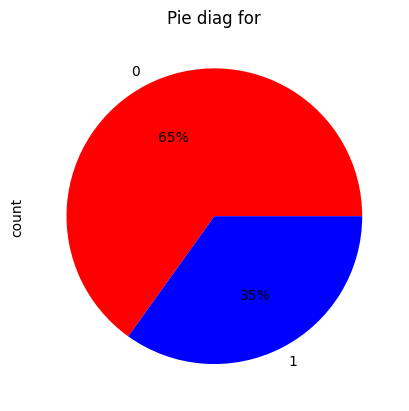

In [45]:
data['Class'].value_counts().groupby('Class').sum().plot(kind='pie', title='Pie diag for', autopct='%1.0f%%', colors=['red', 'blue'])

## Задание 11

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

Axes(0.125,0.11;0.775x0.77)


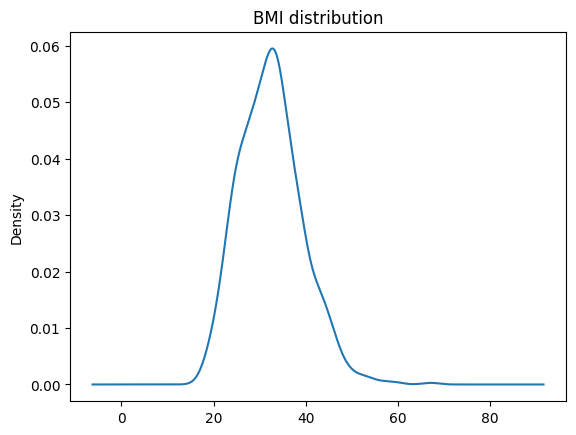

In [46]:
# решение
print(data['BMI'].plot(kind='kde', title='BMI distribution'))

In [47]:
from scipy.stats import norm 
import statistics
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Постройте нормальное распределение поверх графика.

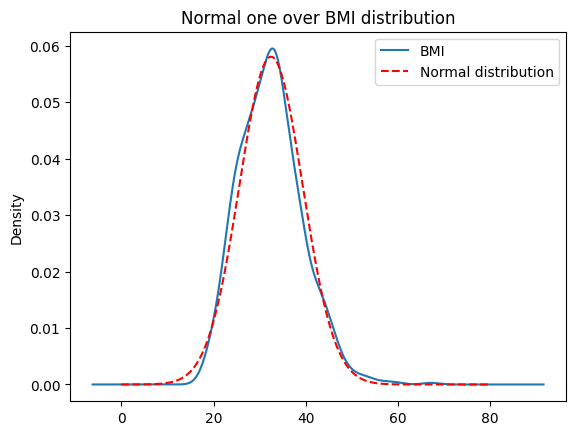

In [48]:
# решение
data['BMI'].plot(kind='kde', title='Normal one over BMI distribution', xlabel = 'BMI', legend=True)

x = np.arange(0, 80, 0.1)
plt.plot(x, norm.pdf(x, data.BMI.mean(), data.BMI.std()), color='red', linewidth=1.5, linestyle='dashed', label='Normal distribution')
plt.legend()
plt.show()

Вывод: Распределение для __BMI__ практически не отличается от сгенерированного нормального. Можно полагать, что значения __BMI__ в рамках нормального распределения. В свою очередь, это значит, что в среднем BMI для данного датасета - data.BMI.mean()

## Задание 12

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

In [49]:
import seaborn as sns

In [50]:
# data.head(3)

<Axes: xlabel='Pregnancies', ylabel='Class'>

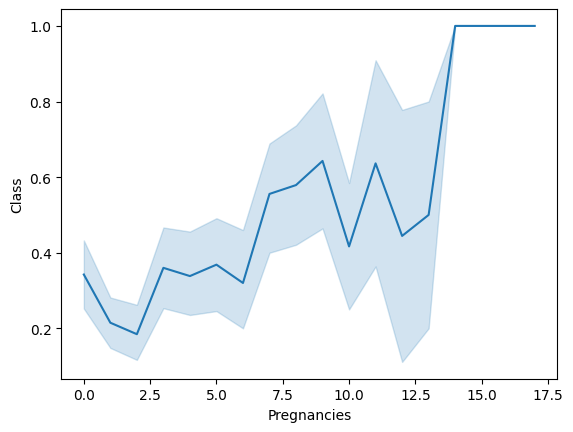

In [51]:
# решение
sns.lineplot(x='Pregnancies', y='Class', data=data)

Вроде выглядит неплохо, но не уверен, что вообще правильно, не понимаю, как интерпретировать график. Ведь у нас Class либо 0, либо 1. Откуда дробные значения между? Или все-таки график построен неверно?

## Задание 13

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [52]:
# решение
data['wasPregnant'] = data['Pregnancies'].apply(lambda x: 1 if x > 0 else 0)

In [53]:
data[['Pregnancies','wasPregnant']].head(5)

,Pregnancies,wasPregnant
0,6,1
1,1,1
2,8,1
3,1,1
4,0,0


## Задание 14

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

NameError: name 'ax1' is not defined

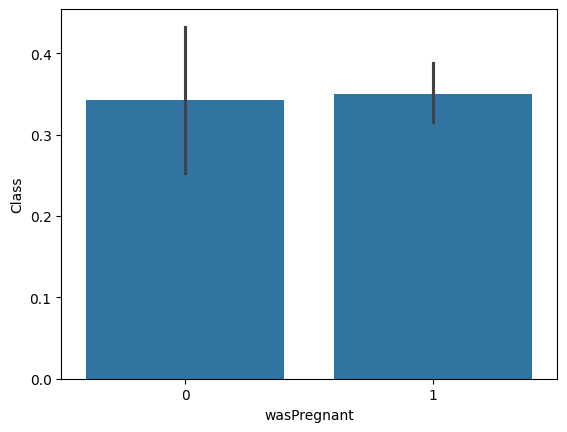

In [54]:
# решение
sns.barplot(x = 'wasPregnant', y = 'Class', data = data)
# data = data.melt(id_vars='Factor').rename(columns=str.title)
# fig, ax1 = pyplot.subplots(figsize=(10, 10))
sns.barplot(x='wasPregnant', y='Class', hue='Variable', data=data, ax=ax1)
# sns.despine(fig)

## Задание 15

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__
    
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [ ]:
# решение

## Задание 16

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [ ]:
# решение